# <NLP [natural language processing]>

### Importing Libraries and Files

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt                          # Re-aranging all the function and libraries at one place
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score
%matplotlib inline
sns.set()

In [4]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t',quoting = 3)
print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
dataset.isnull().sum() # Checking for any null values in the dataset

Review    0
Liked     0
dtype: int64

In [9]:
corpus = []
for i in range (0, 1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # Converting review to lowercase
    review = review.lower()
    # Converting review to list(of strings)
    review = review.split()
    ps = PorterStemmer()
    words_to_stem = ['go','gone','going','giving','gave','give','would','will','can','could','can\'t','having','have','have been','has been','had']
    for words in words_to_stem:
        print(words+": "+ps.stem(words))
    words = stopwords.words('english')
    words.remove('not')
    words.remove('but')
    words.remove('is')
    words.remove('the')
    review = [ps.stem(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: go
giving: give
gave: gave
give: give
would: would
will: will
can: can
could: could
can't: can't
having: have
have: have
have been: have been
has been: has been
had: had
go: go
gone: gone
going: 

In [10]:
len(corpus)

1000

### Creating Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features= 1500)                
X = cv.fit_transform(corpus).toarray()               # Converting into matrix
y = dataset.iloc[:,1].values

In [24]:
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.025, random_state = 25)

# @Restaurant-Reviews-Analysis-SVM-with-PCA

### Applying PCA (Principal Component Analysis)  ¶

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=560)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#### SVM algorithm

In [28]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
# Actual and Predicted value comparision
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:20]

,Actual,Predicted
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0


### Plotting confusion matrix

Accuracy Score:  0.96


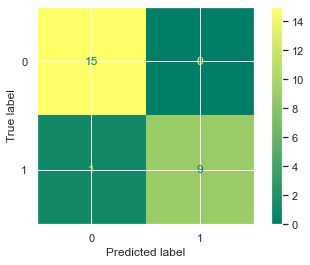

In [30]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = 'summer')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

In [31]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



# @Restaurant-Review-Analysis-KNN

### K-Nearest Neighbor(KNN) Classifier ¶

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### SVM algorithm

In [33]:
# Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

### Plotting confusion matrix

Accuracy Score:  0.96


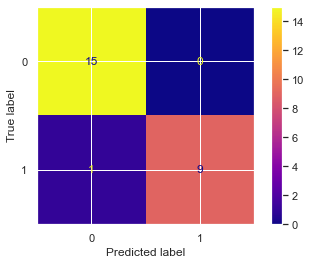

In [34]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = 'plasma')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

In [35]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

